In [67]:
import cv2
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, Model, models, Input, losses, optimizers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

## VGG16 with Algorithm


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(4096, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=keras.losses.sparse_categorical_crossentropy)

In [ ]:
import tensorflow as tf
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
Xtrain = Xtrain[:, :, :, None] / 255.
Xtest = Xtest[:, :, :, None] / 255.
# Xtrain = tf.image.resize(Xtrain, (224, 224))
# Xtrain = tf.image.grayscale_to_rgb(Xtrain)
# Xtest = tf.image.resize(Xtest, (224, 224))
# Xtrain = tf.image.grayscale_to_rgb(Xtest)


In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator()
batch = 128
datagen.fit(Xtrain)
num_batch = len(Xtrain) / batch
Progbar = keras.utils.Progbar(num_batch)
for epoch in range(50):
    batches = 0
    for x, y in datagen.flow(Xtrain, Ytrain, batch_size=batch):
        x = tf.image.resize(x, (224, 224))
        x = tf.image.grayscale_to_rgb(x)
        history = model.fit(x, y, verbose=0)
        batches += 1
        Progbar.update(batches, values=[('loss', history.history['loss'][0])])
        if batches >= num_batch:
            print(epoch)
            break


## VGG16 with Keras

### option1

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
# vgg= VGG16(include_top=False, weights='imagenet')

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, Model

vgg= VGG16(include_top=False, weights='imagenet')
#fit input 
x_in = layers.Input(shape=(32, 32, 1)) 
x = layers.Conv2D(3, 1)(x_in) # Conv2D <-(link_node) x_in
x = vgg(x)
#fit output
x = layers.Flatten()(x)
x = layers.Dense(10, activation="softmax")(x)
model = Model(x_in, x)
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 3)         6         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 14,719,824
Trainable params: 14,719,824
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Xtrain.shape

(60000, 28, 28, 1)

In [ ]:
Xtrain = tf.image.resize(Xtrain, (32, 32)) #vgg require 32*32

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd')
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1246
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0271
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0186
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0136
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0108
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0088
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0074
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0058
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0048
Epoch 10/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0037


In [ ]:
import numpy as np
Xtest = tf.image.resize(Xtest, (32, 32))
Ztest = model.predict(Xtest)
np.sum(Ztest.argmax(axis=1) == Ytest)/len(Ztest)

0.9952

### option 2


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
vgg= VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3)) #Always 3D

#fit outpot
x = layers.Flatten()(vgg.output)
x = layers.Dense(10, activation="softmax")(x)
model = tf.keras.Model(vgg.input, x)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [ ]:
Xtrain = tf.image.grayscale_to_rgb(Xtrain)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd')
model.fit(Xtrain, Ytrain, epochs=10)

In [ ]:
import numpy as np
Xtest = tf.image..grayscale_to_rgb(Xtest)
Ztest = model.predict(Xtest)
np.sum(Ztest.argmax(axis=1) == Ytest)/len(Ztest)

## Autoencoder

In [ ]:
x = np.eye(8).astype(np.float32)
print(x)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
inputs = keras.Input(shape=x.shape[1])
encoder = keras.layers.Dense(3, activation='sigmoid')
decoder = keras.layers.Dense(x.shape[1], activation='sigmoid')
outputs = decoder(encoder(inputs))
model = Model(inputs, outputs)
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=3.5))

In [ ]:
model.summary() #27 = (8*3) + 4(bias = node)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 32        
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x, x, epochs=2000, verbose=0)

In [ ]:
Z = model.predict(x)

In [ ]:
np.round(Z)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
  E = encoder(x)
  np.round(E)

array([[0., 1., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [0., 1., 1.],
       [0., 1., 0.]], dtype=float32)

## Feature Extraction

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import Model, Input, layers, losses, optimizers, datasets
import matplotlib.pyplot as plt


In [33]:
(X, Y), (Xtest, Ytest) = datasets.mnist.load_data()
X = X.astype(np.float32) / 255.0
Xtest = Xtest.astype(np.float32) / 255.0
X = X.reshape(-1, 28*28)
Xtest = Xtest.reshape(-1, 28*28)

In [ ]:
clf = SVC()
clf.fit(X, Y)
Z = clf.predict(Xtest)
print("Accuracy rate = ", accuracy_score(Ytest, Z))
print("Confusion Matrix:")
print(confusion_matrix(Ytest, Z))

Accuracy rate =  0.9792
Confusion Matrix:
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


In [30]:
inputs = Input(shape=X.shape[1])

en1 = layers.Dense(X.shape[1] // 2, activation="relu")
en2 = layers.Dense(X.shape[1] // 4, activation="relu")
en3 = layers.Dense(X.shape[1] // 2, activation="relu")

de1 = layers.Dense(X.shape[1] // 4, activation="relu")
de2 = layers.Dense(X.shape[1] // 2, activation="relu")
de3 = layers.Dense(X.shape[1], activation="relu")

outputs = de3(de2(de1(en3(en2(en1(inputs))))))
model = Model(inputs, outputs)
model.compile(loss=losses.MeanSquaredError(),
              optimizer=optimizers.SGD(learning_rate=0.1))
model.fit(X, X, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0798
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0679
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0561
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0496
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0459
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0433
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0414
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0396
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0378
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0364
Epoch 11/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0355
Epoch 12/100
1875/1875 [==============================] - 3s 2ms/step - lo

###Autoencoder as Reconstructor

In [25]:
Xtestencoded = en3(en2(en1(Xtest))).numpy() #To 98

In [14]:
Recon = de3(de2(de1(Xtestencoded))).numpy() #98->784

In [12]:
type(Recon)

method

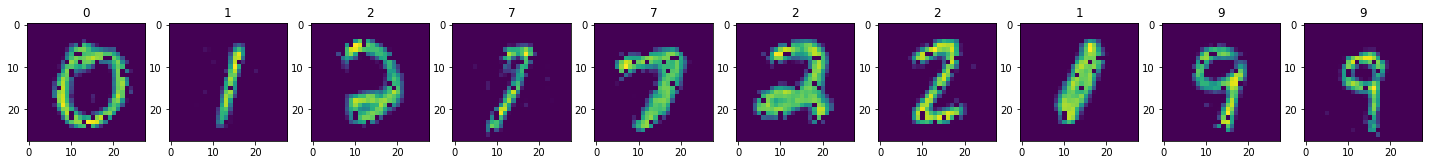

In [18]:
n = 10
plt.figure(figsize=(25,25))
for j, i in enumerate(np.random.randint(0, len(Recon), n)):
    plt.subplot(1, n, j+1)
    plt.imshow(Recon[i].reshape(28, 28))
    plt.title(Ytest[i])
    # plt.axis("off")
plt.show()

### Autoencoder as Reconstructor by Genetic Algorithm


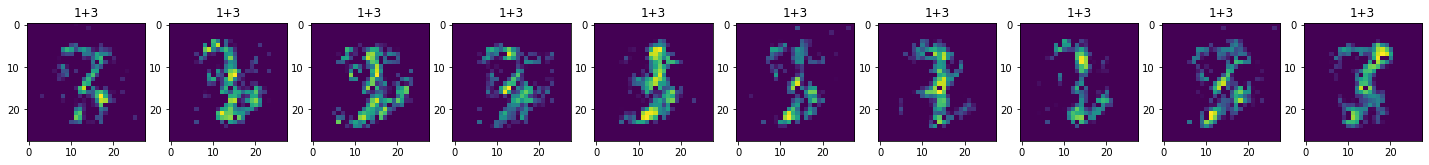

In [29]:
p = [1, 3]
p1 = np.where(Ytest==p[0])[0]
p2 = np.where(Ytest==p[1])[0]
n = 10
plt.figure(figsize=(25,25))
for i in range(n):
    temp = Xtestencoded[[np.random.choice(p1), np.random.choice(p2)]]
    x = np.hstack((temp[0, :temp.shape[1]//2],
                   temp[1, temp.shape[1]//2:])).reshape(1, temp.shape[1])
    Recon = de3(de2(de1(x))).numpy() #98->784
    Recon = Recon.reshape((len(Recon), 28, 28))[0]
    plt.subplot(1, n, i+1)
    plt.imshow(Recon)
    plt.title(str(p[0]) + '+' +str(p[1]))
plt.show()

### Autoencoder With CNN

In [35]:
(X, Y), (Xtest, Ytest) = datasets.mnist.load_data()
X = X.astype(np.float32) / 255.0
Xtest = Xtest.astype(np.float32) / 255.0

In [38]:
inputs = Input(shape=(*X.shape[1:], 1)) #need 3D
x = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(inputs)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation="relu", padding="same")(x)
encoded =  layers.MaxPool2D((2, 2), padding='same')(x)
encoder = Model(inputs, encoded, name='encoder')

encoded_inputs = Input(shape=encoded.shape[1:])
x = layers.Conv2D(8, (3, 3), activation="relu", padding="same")(encoded_inputs)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation="relu")(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation="sigmoid", padding='same')(x)
decoder = Model(encoded_inputs, decoded, name='decoder')

model = Model(inputs, decoder(encoder(inputs)), name="autoencoder")
model.compile(optimizer='sgd', loss='mse')

In [39]:
model.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 4, 4, 8)           1904      
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         1825      
Total params: 3,729
Trainable params: 3,729
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X[:,:,:,None], X[:,:,:,None], epochs=60)

Epoch 1/60
1875/1875 [==============================] - 21s 3ms/step - loss: 0.1070
Epoch 2/60
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0684
Epoch 3/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0564
Epoch 4/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0503
Epoch 5/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0466
Epoch 6/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0442
Epoch 7/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0423
Epoch 8/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0407
Epoch 9/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0392
Epoch 10/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0379
Epoch 11/60
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0367
Epoch 12/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0357


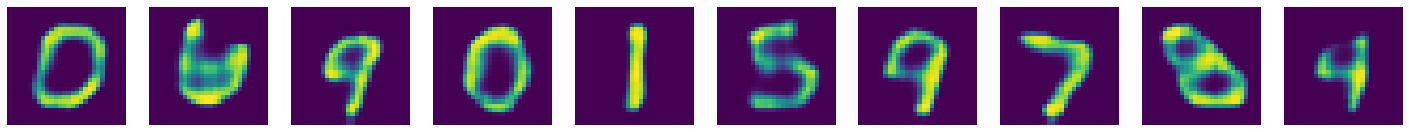

In [44]:
Z = model(Xtest)
n = 10
plt.figure(figsize=(25, 25))
for i in range(10):
    plt.subplot(1, n, i+1)
    plt.imshow(Z[i+10][:,:,0])
    plt.axis('off')
plt.show()

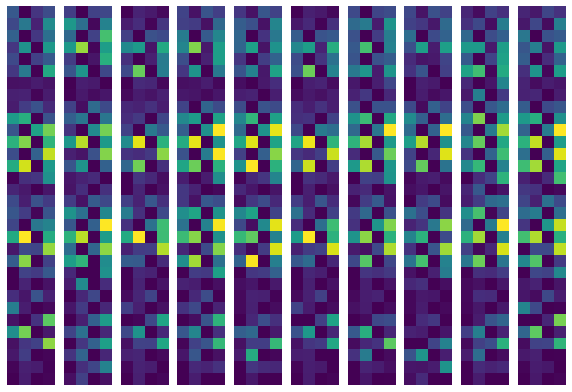

In [45]:
Z = encoder(Xtest)
n = 10
plt.figure(figsize=(10, 10))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(Z[i].numpy().reshape(32, -1))
    plt.axis('off')
plt.show()

#### Denoising

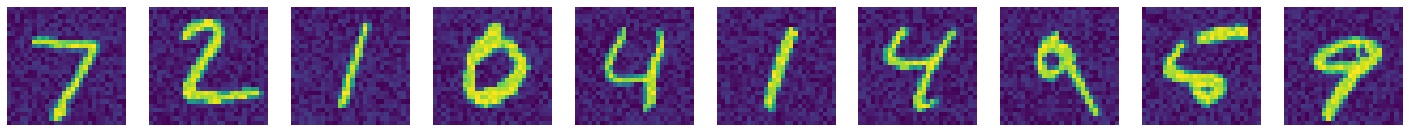

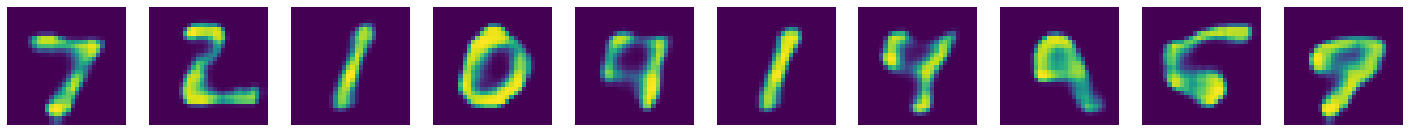

In [52]:
Xnoise = Xtest + 0.2 * np.random.rand(*Xtest.shape)
Xnoise /= Xnoise.max()
Z = model(Xnoise)
n = 10
plt.figure(figsize=(25, 25))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(Xnoise[i])
    plt.axis('off')
plt.show()

plt.figure(figsize=(25, 25))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(Z[i][:,:,0])
    plt.axis('off')
plt.show()

## Semantic Segmentation

### Seg-net

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D, MaxPooling2D, UpSampling2D
import os

In [69]:
img_w = 256
img_h = 256

kernel = 3
autoencoder = [
               #Encode
               Conv2D(64, kernel, padding="same", input_shape=(256, 256, 1)),
               BatchNormalization(),
               Activation("relu"),
               MaxPooling2D(),

               Conv2D(128, kernel, padding="same"),
               BatchNormalization(),
               Activation("relu"),
               MaxPooling2D(),

               Conv2D(256, kernel, padding="same"),
               BatchNormalization(),
               Activation("relu"),
               MaxPooling2D(),              
               
               Conv2D(512, kernel, padding="same"),
               BatchNormalization(),
               Activation("relu"),

               #Decode               
               Conv2D(512, kernel, padding="same"),
               BatchNormalization(),
               Activation("relu"),

               UpSampling2D(),
               Conv2D(256, kernel, padding="same"),
               BatchNormalization(),
               Activation("relu"),

               UpSampling2D(),
               Conv2D(128, kernel, padding="same"),
               BatchNormalization(),
               Activation("relu"),               
               
               UpSampling2D(),
               Conv2D(128, kernel, padding="same"),
               BatchNormalization(),
               Activation("relu"),

               Conv2D(1, 1, 1, padding="same"),
               BatchNormalization(),
               Activation("relu"),

               ]
segnet = models.Sequential(autoencoder)
segnet.compile(loss='mse', optimizer='sgd')

In [70]:
segnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 256, 256, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     512       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 128)     0

In [71]:
path_train = "/content/drive/MyDrive/Lung Segmentation Dataset/train"
Xtrain = []
Ytrain = []
for fn in os.listdir(path_train):
    if fn.endswith('jpg'):
        Xtrain.append(plt.imread(os.path.join(path_train, fn)))
        Ytrain.append(plt.imread(os.path.join(path_train, fn + "-msk.png")))
Xtrain = np.array(Xtrain)[:,:,:,None]
Ytrain = np.array(Ytrain)[:,:,:,None]



In [74]:
segnet.fit(Xtrain, Ytrain, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 103ms/step - loss: 0.0138
Epoch 2/200
1/1 [==============================] - 0s 99ms/step - loss: 0.0138
Epoch 3/200
1/1 [==============================] - 0s 96ms/step - loss: 0.0137
Epoch 4/200
1/1 [==============================] - 0s 100ms/step - loss: 0.0137
Epoch 5/200
1/1 [==============================] - 0s 110ms/step - loss: 0.0136
Epoch 6/200
1/1 [==============================] - 0s 95ms/step - loss: 0.0136
Epoch 7/200
1/1 [==============================] - 0s 95ms/step - loss: 0.0135
Epoch 8/200
1/1 [==============================] - 0s 96ms/step - loss: 0.0135
Epoch 9/200
1/1 [==============================] - 0s 99ms/step - loss: 0.0135
Epoch 10/200
1/1 [==============================] - 0s 97ms/step - loss: 0.0134
Epoch 11/200
1/1 [==============================] - 0s 96ms/step - loss: 0.0134
Epoch 12/200
1/1 [==============================] - 0s 96ms/step - loss: 0.0133
Epoch 13/200
1/1 [============================

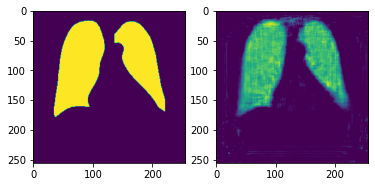

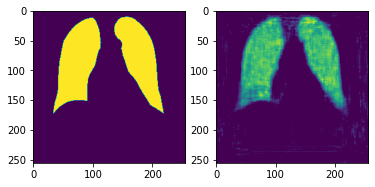

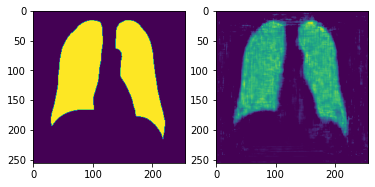

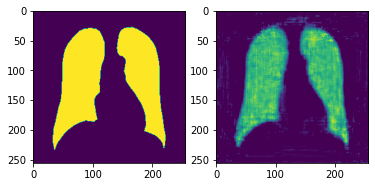

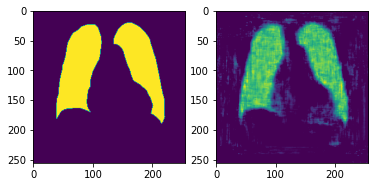

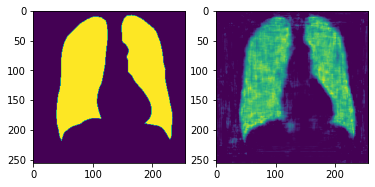

In [75]:
Ztrain = segnet(Xtrain)
for i in range(len(Ztrain)):
    plt.subplot(1, 2, 1)
    plt.imshow(Ytrain[i][:,:,0])
    plt.subplot(1, 2, 2)
    plt.imshow(Ztrain[i][:,:,0])    
    plt.show()

In [76]:
path_test = "/content/drive/MyDrive/Lung Segmentation Dataset/test"
Xtest = []
Ytest = []
for fn in os.listdir(path_test):
    if fn.endswith('jpg'):
        Xtest.append(plt.imread(os.path.join(path_test, fn)))
        Ytest.append(plt.imread(os.path.join(path_test, fn + "-msk.png")))
Xtest = np.array(Xtest)[:,:,:,None]
Ytest = np.array(Ytest)[:,:,:,None]


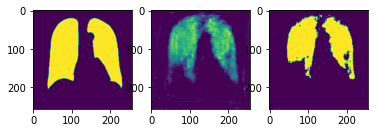

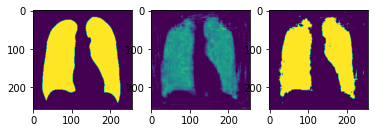

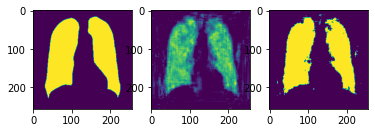

In [85]:
Ztest = segnet(Xtest)
for i in range(len(Ztest)):
    plt.subplot(1, 3, 1)
    plt.imshow(Ytest[i][:,:,0])
    plt.subplot(1, 3, 2)
    plt.imshow(Ztest[i][:,:,0])
    plt.subplot(1, 3, 3)
    plt.imshow(Ztest[i][:,:,0] > 0.5)      
    plt.show()

### U-net